##### 인프런 강의를 참고하여 작성된 코드입니다
https://inf.run/qmKN

In [ ]:
# google drive와 colab 연결 (dirve mount)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #결측 개수 확인

#### 전처리 및 EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML DL/[kaggle]/london_merged.csv', parse_dates=['timestamp']) #timestamp변수를 date포맷으로 인식
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
# 데이터 타입과 구조

print('데이터의 구조는:', df.shape)
print('데이터의 타입은:', df.dtypes)
print('데이터의 컬럼은:', df.columns)

데이터의 구조는: (17414, 10)
데이터의 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 컬럼은: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [ ]:
df.isna().sum() #변수 별 결측개수 합

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

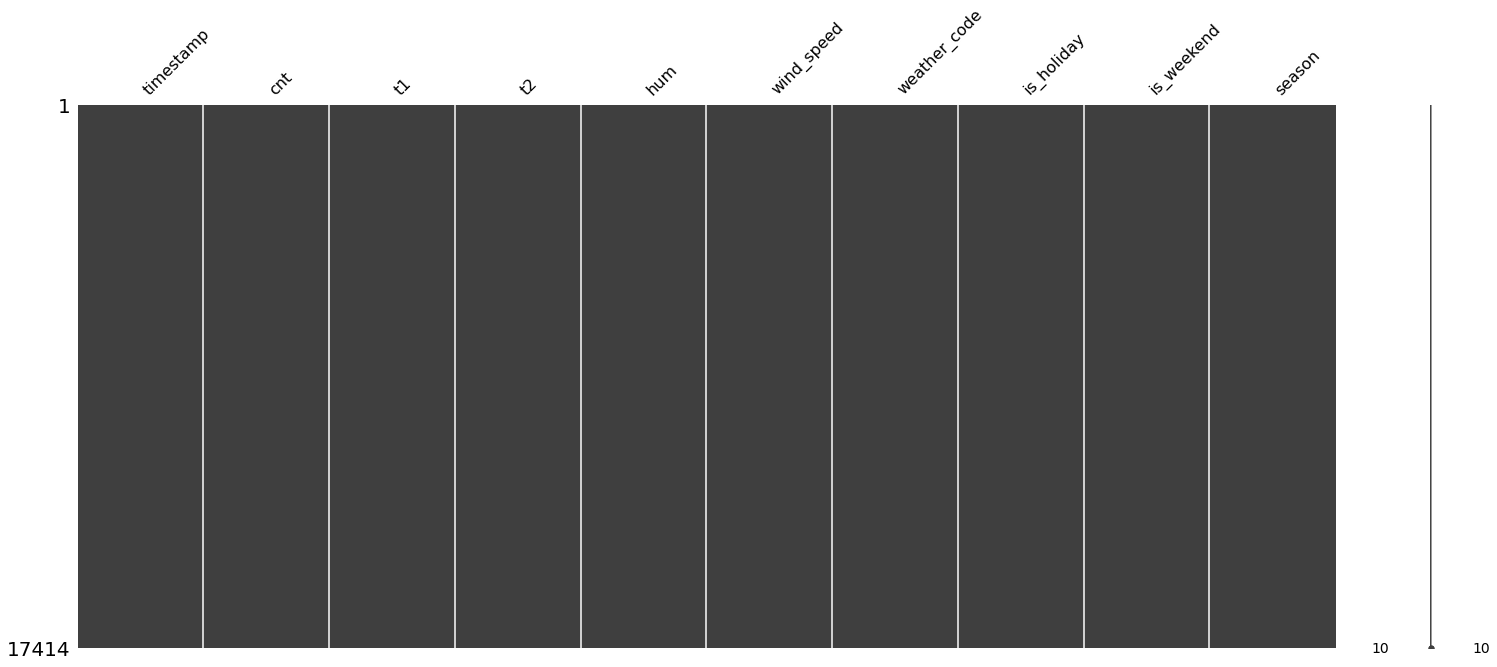

In [ ]:
msno.matrix(df)
plt.show() # 결측치 개수 표

In [ ]:
# timestamp 변수값 속성에따라 분류하여 년,월, 요일, 시간 변수 새로 생성
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [ ]:
# 값 별 합계
df['year'].value_counts()
df['month'].value_counts()
df['dayofweek'].value_counts() 
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


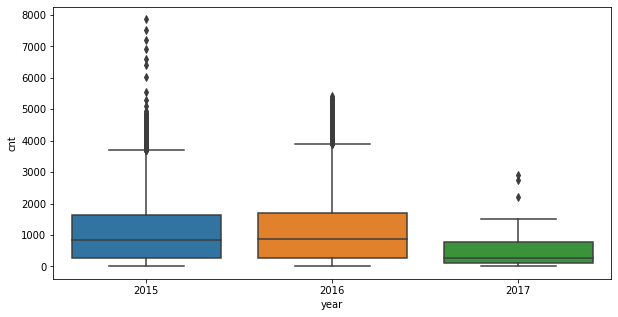

In [ ]:
a, b = plt.subplots(1, 1, figsize=(10, 5)) # 그래프 판 만들기
sns.boxplot(df['year'], df['cnt']) # boxplot 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


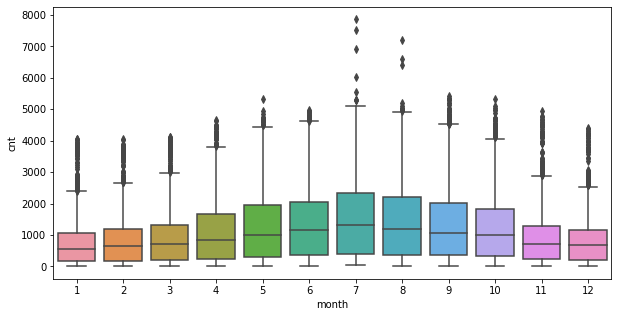

In [ ]:
a, b = plt.subplots(1, 1, figsize=(10, 5)) # 그래프 판 만들기
sns.boxplot(df['month'], df['cnt']) # boxplot 그래프

In [ ]:
# 그래프 함수 만들기

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12, 3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

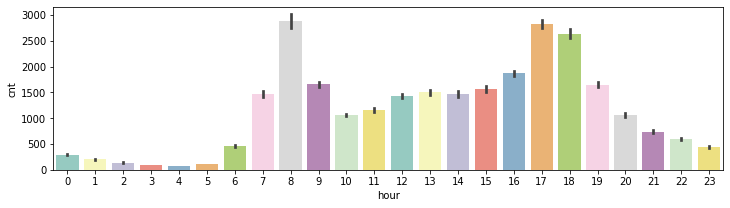

In [ ]:
plot_bar(df, 'hour')

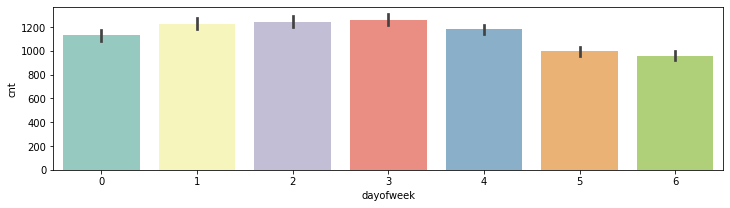

In [ ]:
plot_bar(df, 'dayofweek')

In [ ]:
# 아웃라이어 제거 (시그마 이상치 제거법) 함수 만들기

def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [ ]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거전:', df.shape)
print('이상치 제거후:', df_out.shape)

이상치 제거전: (17414, 14)
이상치 제거후: (17265, 14)


In [ ]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [ ]:
#범주형 데이터로 바꿔주기
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['dayofweek'] = df_out['dayofweek'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# pandas 라이브러리 내에 더미변수 생성해주는 함수 이용 #딥러닝에서는 꼭 처리해줘야함(학습하기 용히하도록)
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'dayofweek'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,season_0.0,season_1.0,season_2.0,season_3.0,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,3,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_out.shape

(17265, 42)

In [ ]:
#독립변수와 종속변수 분리하기

df_y = df_out['cnt'] #자전거 이용객 수
df_x = df_out.drop(['timestamp', 'cnt'], axis=1) # axis=1은 열 기준으로 드롭 , 0은 행 기준으로 드롭
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,season_0.0,season_1.0,season_2.0,season_3.0,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3.0,2.5,93.0,5.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.5,2.5,96.5,0.0,0.0,1.0,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2.0,2.0,100.0,0.0,0.0,1.0,3,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2.0,0.0,93.0,6.5,0.0,1.0,4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

#### 딥러닝 모형

In [ ]:
# 훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)
# random_state는 seed 넘버처럼 고정 시키는 것, test_size 3:7로 테스트:훈련, 시계열 데이터므로 shuffle은 작동X


In [ ]:
print('x_train의 구조는:', x_train.shape)
print('y_train의 구조는:', y_train.shape)
print('x_test의 구조는:', x_test.shape)
print('x_test의 구조는:', y_test.shape)

x_train의 구조는: (12085, 40)
y_train의 구조는: (12085,)
x_test의 구조는: (5180, 40)
x_test의 구조는: (5180,)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping # overfitting 되면 멈출 수 있도록

In [ ]:
# 층 만들어 주기

model = Sequential()
model.add(Dense(units = 160, activation = 'relu', input_dim = 40))
model.add(Dense(units = 60, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               6560      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 17,461
Trainable params: 17,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience = 5, mode='min') # loss가 줄어드는 방향으로 최적화, 과적합 5번까지 허용
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping]) 
# 훈련을 전체 데이터의 50번정도 반복(epochs), 훈련 데이터 단위 (batch_size), 검증용 데이터 10% 분리 (validation_split) - overfitting 방지, 과적합 되기전에 early_stopping
# 그래프로 확인하기위해 history라는 변수로 할당

Epoch 1/50
10876/10876 [==============================] - 23s 2ms/step - loss: 567.1584 - mae: 567.1584 - val_loss: 588.7458 - val_mae: 588.7458
Epoch 2/50
10876/10876 [==============================] - 22s 2ms/step - loss: 473.3972 - mae: 473.3972 - val_loss: 502.6514 - val_mae: 502.6514
Epoch 3/50
10876/10876 [==============================] - 26s 2ms/step - loss: 421.9770 - mae: 421.9770 - val_loss: 453.0085 - val_mae: 453.0085
Epoch 4/50
10876/10876 [==============================] - 27s 2ms/step - loss: 395.9665 - mae: 395.9665 - val_loss: 489.4613 - val_mae: 489.4613
Epoch 5/50
10876/10876 [==============================] - 27s 2ms/step - loss: 369.4457 - mae: 369.4457 - val_loss: 424.3087 - val_mae: 424.3087
Epoch 6/50
10876/10876 [==============================] - 23s 2ms/step - loss: 345.8047 - mae: 345.8047 - val_loss: 380.5783 - val_mae: 380.5783
Epoch 7/50
10876/10876 [==============================] - 23s 2ms/step - loss: 330.6849 - mae: 330.6849 - val_loss: 359.2717 - val

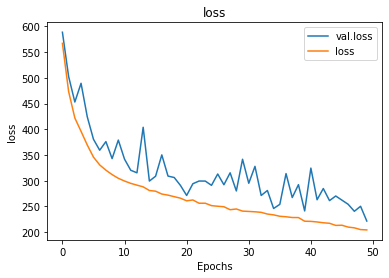

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val.loss', 'loss'])
plt.show()

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))
  
print('RMSE', RMSE(y_test, y_predict))

RMSE 477.4148027003259


#### 머신러닝 모형
1.   랜덤포레스트
2.   부스팅 계열 모형 (순차적으로 학습) : XGBoost, LightGBM

- 모형평가는 RMSE(root씌운 MSE)


##### 1. 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)

print('RMSE', RMSE(y_test, rf_result))

RMSE 280.4306428360386


##### 2. 부스팅 계열

In [ ]:
#XGBoost 모형

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)

print('RMSE', RMSE(y_test, xgb_result))

[04:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE 417.77480841379963


In [ ]:
#LightGBM 모형

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train, y_train)
lgb_result= lgb.predict(x_test)

print('RMSE', RMSE(y_test, lgb_result))

RMSE 289.45696079593114


#### 모형비교

In [ ]:
lgb = pd.DataFrame(lgb_result)
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)

compare = pd.DataFrame(y_test).reset_index(drop=True)

In [ ]:
compare.head()

,cnt
0,1885
1,2175
2,2485
3,2882
4,2965


In [ ]:
compare['lgb'] = lgb
compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn
compare.head()

,cnt,lgb,xgb,rf,dnn
0,1885,2180.209794,1584.790039,2091.64,2221.209473
1,2175,2264.791916,1746.654419,1982.01,2704.970703
2,2485,2622.855338,2078.126221,2384.50,2973.265625
3,2882,2717.698750,2123.717041,2404.47,2916.580322
4,2965,2711.021494,2332.191650,2414.20,2820.417480


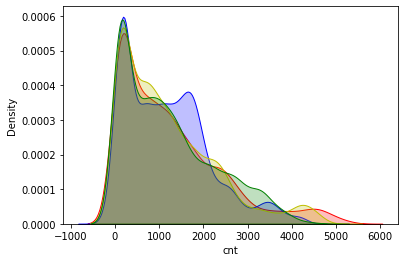

In [ ]:
#커널밀도 그래프

sns.kdeplot(compare['cnt'], shade = True, color='r')
sns.kdeplot(compare['xgb'], shade = True, color='b')
sns.kdeplot(compare['rf'], shade = True, color='y')
sns.kdeplot(compare['dnn'], shade = True, color='g')
#sns.kdeplot(compare['lgb'], shade = True, color='')

### 시계열 딥러닝
##### 자전거 이용 객수만의 시계열 데이터 자체 패턴을 기반으로 학습 (그 외 입력 변수X)



1.   RNN
2.   LSTM
3.   GRU





In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML DL/[kaggle]/london_merged.csv', parse_dates=['timestamp']) #timestamp변수를 date포맷으로 인식
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
# 17000개 학습용, 414개 테스트용 분리 (pandas iloc 기능)
train = df.iloc[:17000, 1:2] #행, 렬(CNT)
test = df.iloc[17000:17414, 1:2]

In [ ]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


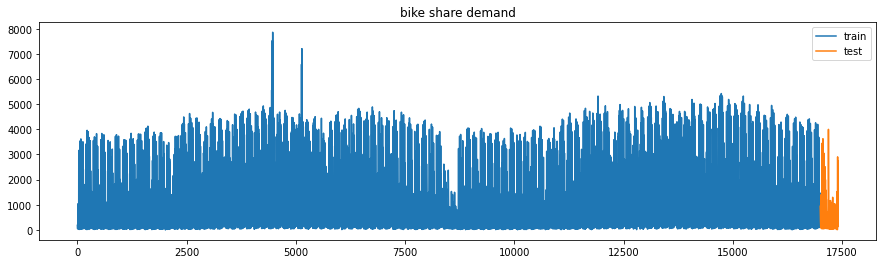

In [ ]:
df['cnt'][:17000].plot(figsize=(15,4), legend=True)
df['cnt'][17000:].plot(figsize=(15,4), legend=True)
plt.legend(['train', 'test'])
plt.title('bike share demand')
plt.show()

##### 데이터 전처리

In [ ]:
from statsmodels.tsa.stattools import pacf #차수 추정 방법 중 하나

pacf = pacf(df['cnt'], nlags=20, method='ols')

print(pacf)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

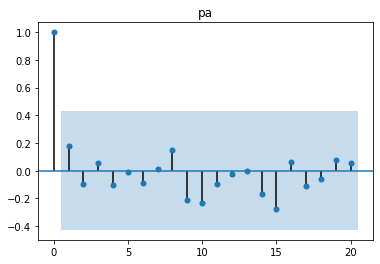

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pacf, lags=20, method='ols', title='pa').show

# 1시간 간격 이후에는 확 떨어짐
# 1시간 전 데이터를 독립변수로 삼아서 그 다음 시간을 예측하는

In [ ]:
# 스케일 작업으로 정규분포 만들기 (최소값과 최대값으로) : MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train)


In [ ]:
train_scaled

array([[0.02315522],
       [0.01755725],
       [0.01704835],
       ...,
       [0.17468193],
       [0.16348601],
       [0.14083969]])

In [ ]:
# 1시간 단위로 shift 시켜서 Xt(i-1)을 독립변수로 만들기

x_train = []
y_train = []

for i in range(1, 17000):
  x_train.append(train_scaled[i-1:i, 0]) #1시간 전 값
  y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(16999, 1)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 3차원 배열로 만들기
x_train.shape

(16999, 1, 1)

##### 1. RNN 모형
- 과거의 정보를 보관
- Sequence data, 시계열 분석에 활용

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(activation='relu', units=6, input_shape=(1,1)))
rnn.add(Dense(activation='linear', units=1))

In [ ]:
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6)                 48        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
rnn.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
rnn.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
16999/16999 [==============================] - 45s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 2/2
16999/16999 [==============================] - 26s 2ms/step - loss: 0.0077 - mse: 0.0077


In [ ]:
inputs = sc.transform(test)
inputs.shape

(414, 1)

In [ ]:
x_test = []

for i in range(1, 415):
  x_test.append(inputs[i-1:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(414, 1, 1)

In [ ]:
rnn = rnn.predict(x_test)
rnn = sc.inverse_transform(rnn) #scale작업한 것을 원래 값으로 되돌리기

In [ ]:
#데이터 프레임으로 바꿔줘야 그래프로 그릴 수 있음

test1 = pd.DataFrame(test)
rnn1 = pd.DataFrame(rnn)

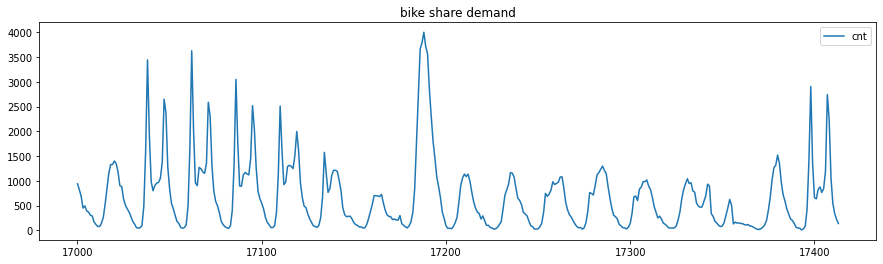

In [ ]:
# 테스트 세트 그래프 그리기

test1.plot(figsize=(15, 4), legend=True)
plt.legend(['cnt'])
plt.title('bike share demand')
plt.show()

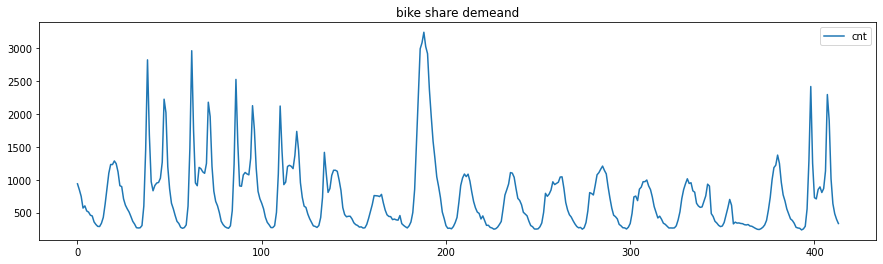

In [ ]:
# 학습하여 예측한 결과 값 그래프 그리기

rnn1.plot(figsize=(15,4), legend=True)
plt.legend(['cnt'])
plt.title('bike share demeand')
plt.show()

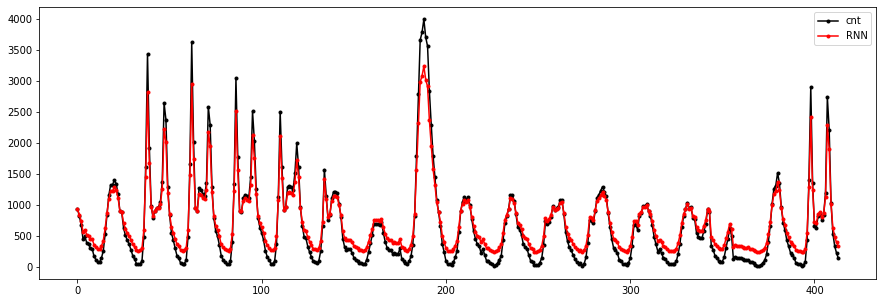

In [ ]:
# 한 표에 동시에 나오게 그리기

test = np.array(test) # 다시 array로 만들어주기

plt.figure(figsize=(15, 5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker='.', label='RNN', color='red')
plt.legend()

# rnn이 과소적합한 형태인 것을 알 수 있다 

##### 2. LSTM
- 경사하강 문제 해결 (RNN의 단점 해결)
- 메모리 블락 사용으로 장기 메모리
- RNN보다 성능이 높음

In [ ]:
from keras.layers.recurrent import LSTM
lstm = Sequential()
lstm.add(LSTM(units=6, activation='relu', input_shape=(1,1)))
lstm.add(Dense(units=1, activation='linear'))

In [ ]:
print(lstm.summary())

#파라미터가 192개로 더 정교하게 추정할 수 있지만 overfitting의 가능성이 있음

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 192       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
lstm.compile(loss='mse', optimizer = 'adam', metrics=['mse'])
lstm.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
16999/16999 [==============================] - 47s 3ms/step - loss: 0.0090 - mse: 0.0090
Epoch 2/2
16999/16999 [==============================] - 44s 3ms/step - loss: 0.0075 - mse: 0.0075


In [ ]:
lstm = lstm.predict(x_test)
lstm = sc.inverse_transform(lstm)

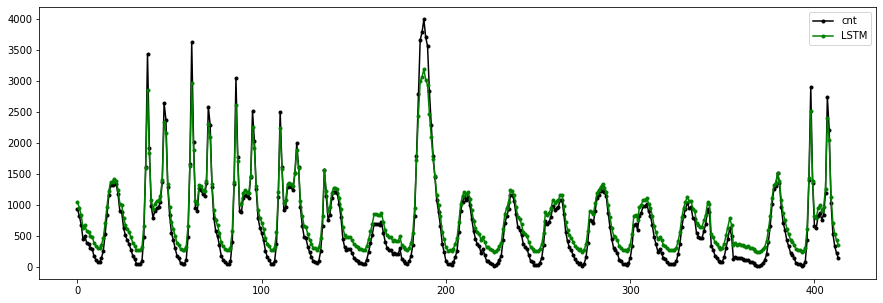

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(lstm, marker='.', label='LSTM', color='green')
plt.legend()

#####3. GRU  (Gated Recurrent Unit)(뉴욕대 교수님 개발)
* LSTM의 overfitting을 보완
* Unit 개수는 줄여주면서 성능은 동일한 수준으로 유지




In [ ]:
from keras.layers.recurrent import GRU

gru = Sequential()
gru.add(GRU(units=6, activation='relu', input_shape=(1,1)))
gru.add(Dense(units=1, activation='linear'))

In [ ]:
print(gru.summary())
#parameter수가 LSTM에 비해 줄어든 걸 알 수 있다

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6)                 144       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
gru.compile(loss='mse', optimizer='adam', metrics=['mse'])
gru.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
16999/16999 [==============================] - 76s 4ms/step - loss: 0.0081 - mse: 0.0081
Epoch 2/2
16999/16999 [==============================] - 76s 4ms/step - loss: 0.0074 - mse: 0.0074


In [ ]:
gru = gru.predict(x_test)
gru = sc.inverse_transform(gru)

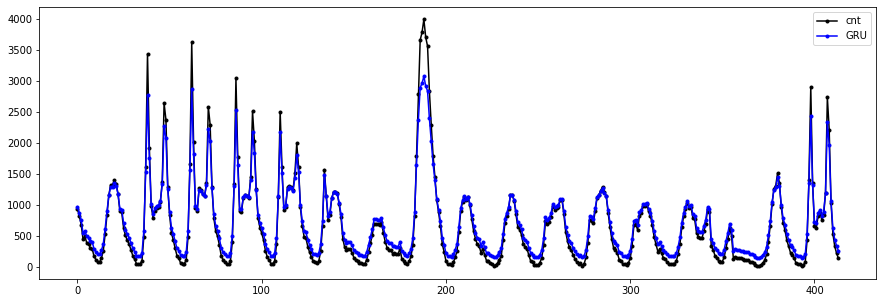

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(gru, marker='.', label='GRU', color='blue')
plt.legend()

##### 모형비교

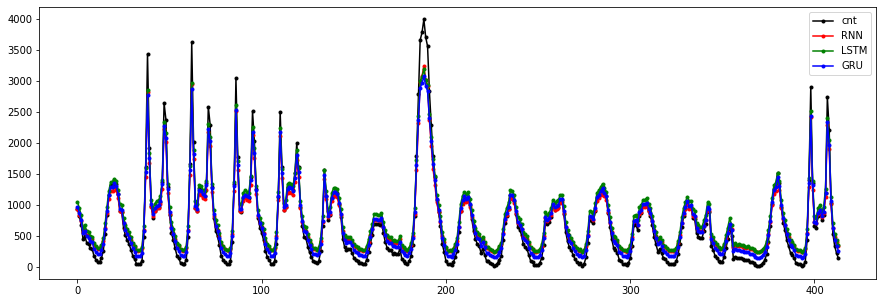

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker='.', label='RNN', color='red')
plt.plot(lstm, marker='.', label='LSTM', color='green')
plt.plot(gru, marker='.', label='GRU', color='blue')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
print("RNN RMSE:", RMSE(test, rnn))
print("LSTM RMSE:", RMSE(test, lstm))
print("GRU RMSE:", RMSE(test, gru))

#사실상 epoch수가 너무 작아서 parameter 조정이 어떻게 되냐에따라 결과 값이 바뀔 가능성이 충분함

RNN RMSE: 183.05097113126126
LSTM RMSE: 198.573316187788
GRU RMSE: 153.55250471695567
